In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

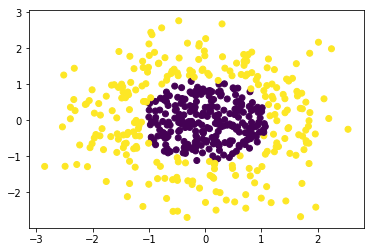

In [2]:
# generate the two-dimensions normally distributed data, 2 features, 2 labels, and 500 rows
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


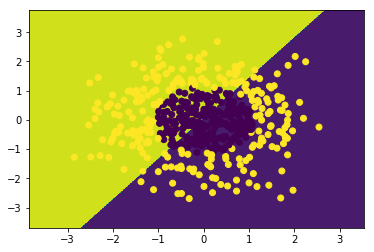

score: 0.536


In [3]:
# no using the nonlinear logistics
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))

d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


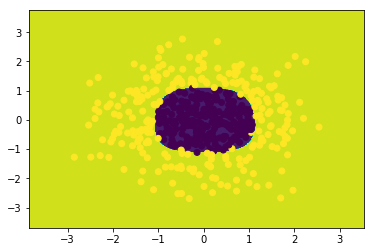

score: 0.986


In [4]:
# using the nonlinear logistics
poly_reg  = PolynomialFeatures(degree=5) 
x_poly = poly_reg.fit_transform(x_data)
logistic = linear_model.LogisticRegression()
logistic.fit(x_poly, y_data)

x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly,y_data))

0.986


d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\language\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


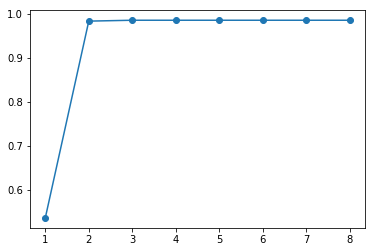

In [5]:
# create a list to store the score of each degree
scores = []
for i in range(1,9):
    poly_reg  = PolynomialFeatures(degree=i) 
    x_poly = poly_reg.fit_transform(x_data)
    logistic = linear_model.LogisticRegression()
    logistic.fit(x_poly, y_data)

    scores.append(logistic.score(x_poly,y_data))
plt.plot(range(1, 9), scores, marker = 'o')
print(max(scores))